In [5]:
import os
os.chdir("..")

In [14]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For saving models
import joblib

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("="*60)
print("MODEL DEVELOPMENT NOTEBOOK")
print("="*60)
print("-> All libraries imported successfully!")
print(f"Current date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

MODEL DEVELOPMENT NOTEBOOK
-> All libraries imported successfully!
Current date: 2025-12-13 15:10:55


In [15]:
# load processed data
print("\n" + "="*60)
print("LOADING PROCESSED DATA")
print("="*60)

df = pd.read_csv('data/processed/for_continuous/tb_data_processed.csv')

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

print(f"-> Data loaded successfully!")
print(f"\nDataset info:")
print(f"  Shape: {df.shape}")
print(f"  Rows: {df.shape[0]:,}")
print(f"  Columns: {df.shape[1]}")
print(f"  Date range: {df['date'].min()} to {df['date'].max()}")
print(f"  Districts: {df['district'].nunique()}")
print(f"  Missing values: {df.isnull().sum().sum()}")

# Display first few rows
print("\nFirst 3 rows:")
print(df.head(3))


LOADING PROCESSED DATA
-> Data loaded successfully!

Dataset info:
  Shape: (107877, 92)
  Rows: 107,877
  Columns: 92
  Date range: 2021-03-02 00:00:00 to 2024-12-31 00:00:00
  Districts: 77
  Missing values: 0

First 3 rows:
  district       date      co  humidity    nh3   no2     o3    pm10  \
0   Achham 2021-03-02  540.59     18.17  12.95  4.59  85.71   69.70   
1   Achham 2021-03-03  669.52     19.36  12.18  4.13  90.36  107.86   
2   Achham 2021-03-04  685.93     18.03  12.45  4.45  93.25  111.69   

   precipitation  air_pressure  ...  so2_lag_60  so2_lag_90  no2_lag_60  \
0            0.0         96.62  ...         0.0         0.0         0.0   
1            0.0         96.53  ...         0.0         0.0         0.0   
2            0.0         96.53  ...         0.0         0.0         0.0   

   no2_lag_90  co_lag_60  co_lag_90  o3_lag_60  o3_lag_90  \
0         0.0        0.0        0.0        0.0        0.0   
1         0.0        0.0        0.0        0.0        0.0   
2  

In [16]:
# define features and target variable
print("\n" + "="*60)
print("PREPARING FEATURES AND TARGET")
print("="*60)

# Columns to drop (non-predictive)
drop_cols = ['date', 'district']

# Target variable
target = 'tb_case'

# Feature columns (everything except date, district, and target)
feature_cols = [col for col in df.columns if col not in drop_cols + [target]]

# Separate features and target
X = df[feature_cols].copy()
y = df[target].copy()

print(f"-> Features and target prepared!")
print(f"\nFeature matrix (X):")
print(f"  Shape: {X.shape}")
print(f"  Number of features: {len(feature_cols)}")

print(f"\nTarget variable (y):")
print(f"  Shape: {y.shape}")
print(f"  Mean TB cases: {y.mean():.2f}")
print(f"  Min TB cases: {y.min()}")
print(f"  Max TB cases: {y.max()}")
print(f"  Std TB cases: {y.std():.2f}")

print(f"\nFeature names:")
for i, col in enumerate(feature_cols, 1):
    print(f"  {i:3d}. {col}")


PREPARING FEATURES AND TARGET
-> Features and target prepared!

Feature matrix (X):
  Shape: (107877, 89)
  Number of features: 89

Target variable (y):
  Shape: (107877,)
  Mean TB cases: 1.24
  Min TB cases: 0.0
  Max TB cases: 66.0
  Std TB cases: 2.16

Feature names:
    1. co
    2. humidity
    3. nh3
    4. no2
    5. o3
    6. pm10
    7. precipitation
    8. air_pressure
    9. so2
   10. solar_radiation
   11. avg_temp
   12. tb_case_lag_7
   13. tb_case_lag_14
   14. tb_case_lag_30
   15. avg_temp_lag_7
   16. avg_temp_lag_14
   17. avg_temp_lag_30
   18. humidity_lag_7
   19. humidity_lag_14
   20. humidity_lag_30
   21. precipitation_lag_7
   22. precipitation_lag_14
   23. precipitation_lag_30
   24. pm10_lag_7
   25. pm10_lag_14
   26. pm10_lag_30
   27. so2_lag_7
   28. so2_lag_14
   29. so2_lag_30
   30. no2_lag_7
   31. no2_lag_14
   32. no2_lag_30
   33. co_lag_7
   34. co_lag_14
   35. co_lag_30
   36. o3_lag_7
   37. o3_lag_14
   38. o3_lag_30
   39. solar_radiati

In [17]:
# Final data quality check
print("\n" + "="*60)
print("DATA QUALITY CHECK")
print("="*60)

# Check for NaN in features
nan_features = X.isnull().sum()
if nan_features.sum() > 0:
    print("# WARNING: NaN values found in features:")
    print(nan_features[nan_features > 0])
else:
    print("-> No NaN values in features")

# Check for NaN in target
if y.isnull().sum() > 0:
    print(f"# WARNING: {y.isnull().sum()} NaN values in target")
else:
    print("-> No NaN values in target")

# Check for infinite values
numeric_X = X.select_dtypes(include=[np.number])

inf_features = np.isinf(numeric_X).sum()
if inf_features.sum() > 0:
    print("# WARNING: Infinite values found in features")
else:
    print("-> No infinite values in features")

# Check data types
print(f"\nData types in features:")
print(X.dtypes.value_counts())

print("\n-> Data quality check complete!")


DATA QUALITY CHECK
-> No NaN values in features
-> No NaN values in target
-> No infinite values in features

Data types in features:
float64    87
int64       1
object      1
Name: count, dtype: int64

-> Data quality check complete!


In [18]:
# Split data into training and testing sets
print("\n" + "="*60)
print("SPLITTING DATA (TEMPORAL SPLIT BY DISTRICT)")
print("="*60)

# 1. Sort by district + date to preserve time-order for each district
df_sorted = df.sort_values(['district', 'date']).reset_index(drop=True)

# 2. Choose test period (all of 2024)
test_start_date = pd.to_datetime('2024-01-01')

# 3. Create boolean masks
train_mask = df_sorted['date'] < test_start_date
test_mask  = df_sorted['date'] >= test_start_date

# 4. Split features and target
X_train = df_sorted.loc[train_mask, feature_cols].copy()
y_train = df_sorted.loc[train_mask, target].copy()

X_test  = df_sorted.loc[test_mask, feature_cols].copy()
y_test  = df_sorted.loc[test_mask, target].copy()

# 5. Split date info (optional but useful)
train_dates = df_sorted.loc[train_mask, 'date']
test_dates  = df_sorted.loc[test_mask, 'date']

print("-> Data split complete!")

# --------------------
# Summary Information
# --------------------
print(f"\nTraining set:")
print(f"  Samples: {X_train.shape[0]:,}")
print(f"  Date range: {train_dates.min()} to {train_dates.max()}")
print(f"  TB cases - Mean: {y_train.mean():.2f}, Min: {y_train.min()}, Max: {y_train.max()}")

print(f"\nTesting set:")
print(f"  Samples: {X_test.shape[0]:,}")
print(f"  Date range: {test_dates.min()} to {test_dates.max()}")
print(f"  TB cases - Mean: {y_test.mean():.2f}, Min: {y_test.min()}, Max: {y_test.max()}")

print(f"\nFeature dimensions:")
print(f"  X_train: {X_train.shape}")
print(f"  X_test: {X_test.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  y_test: {y_test.shape}")



SPLITTING DATA (TEMPORAL SPLIT BY DISTRICT)
-> Data split complete!

Training set:
  Samples: 79,695
  Date range: 2021-03-02 00:00:00 to 2023-12-31 00:00:00
  TB cases - Mean: 1.16, Min: 0.0, Max: 35.0

Testing set:
  Samples: 28,182
  Date range: 2024-01-01 00:00:00 to 2024-12-31 00:00:00
  TB cases - Mean: 1.44, Min: 0.0, Max: 66.0

Feature dimensions:
  X_train: (79695, 89)
  X_test: (28182, 89)
  y_train: (79695,)
  y_test: (28182,)



VISUALIZING TRAIN-TEST SPLIT


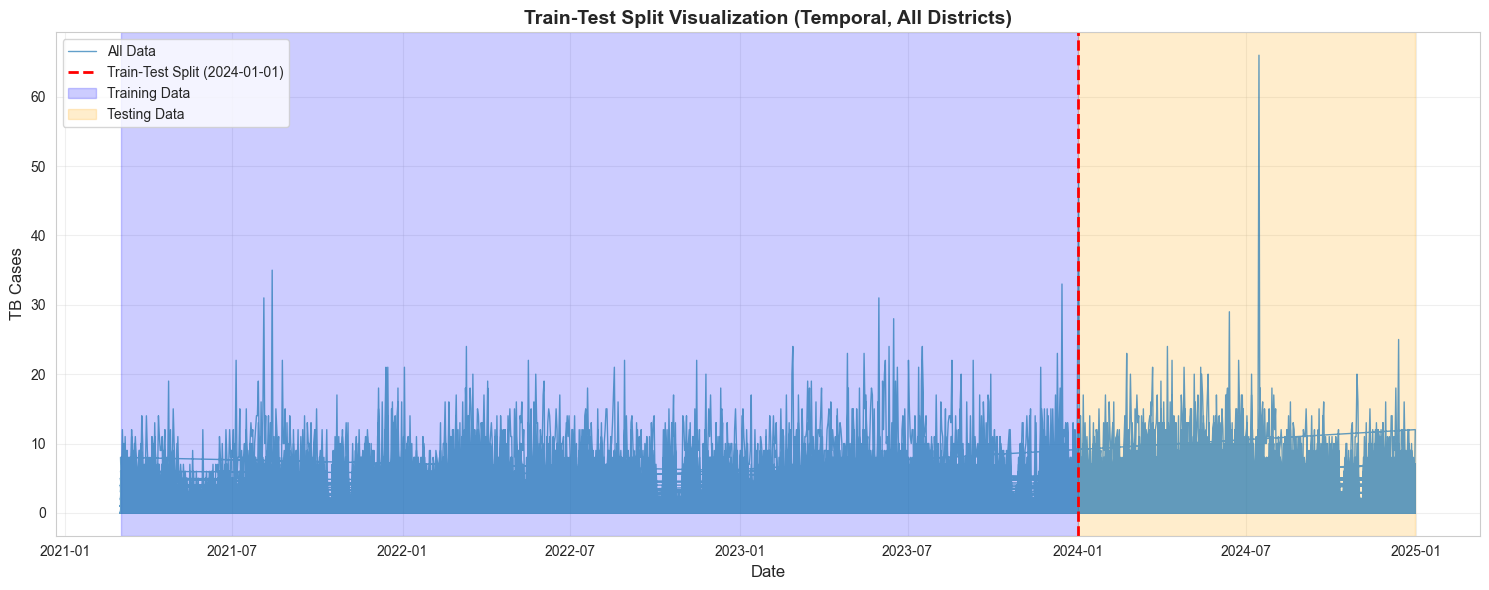

-> Visualization saved to 'figures/train_test_split.png'


In [19]:
# Visualize the train-test split
print("\n" + "="*60)
print("VISUALIZING TRAIN-TEST SPLIT")
print("="*60)

plt.figure(figsize=(15, 6))

# Use the sorted dataframe used for splitting
dates_sorted = df_sorted["date"]
y_sorted = df_sorted["tb_case"]

# Convert to numpy for plotting
full_dates = dates_sorted.values
full_tb = y_sorted.values

# Plot full TB case timeline (all districts combined)
plt.plot(full_dates, full_tb, linewidth=1, alpha=0.7, label='All Data')

# Train-test split boundary (2024-01-01)
split_date = pd.to_datetime("2024-01-01")
plt.axvline(x=split_date, color='red', linestyle='--', linewidth=2, 
            label=f'Train-Test Split ({split_date.strftime("%Y-%m-%d")})')

# Shade training region
plt.axvspan(dates_sorted.min(), split_date, 
            alpha=0.2, color='blue', label='Training Data')

# Shade testing region
plt.axvspan(split_date, dates_sorted.max(), 
            alpha=0.2, color='orange', label='Testing Data')

plt.title('Train-Test Split Visualization (Temporal, All Districts)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('TB Cases', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save figure
plt.savefig('figures/train_test_split.png', dpi=300, bbox_inches='tight')
plt.show()

print("-> Visualization saved to 'figures/train_test_split.png'")


In [20]:
# ============================================================
# MODEL 1: CATBOOST REGRESSOR (Weighted for Rare High TB Cases)
# ============================================================

print("\n" + "="*70)
print("MODEL 1: CATBOOST REGRESSOR (Weighted)")
print("="*70)

from catboost import CatBoostRegressor, Pool

# ----------------------------
# 1. Detect categorical features
# ----------------------------
cat_features = [
    i for i, col in enumerate(X_train.columns)
    if X_train[col].dtype == "object"
]
print("Categorical features:", cat_features, [X_train.columns[i] for i in cat_features])

# ----------------------------
# 2. Compute sample weights
# Give higher weight to higher TB cases to improve prediction for rare spikes
# ----------------------------
train_weights = 1 + (y_train - 1) * 2
# Optional: clip to avoid extremely large weights
train_weights = np.clip(train_weights, 1, 5)

# ----------------------------
# 3. Prepare CatBoost Pool
# ----------------------------
train_pool = Pool(X_train, y_train, cat_features=cat_features, weight=train_weights)
test_pool  = Pool(X_test,  y_test,  cat_features=cat_features)

# ----------------------------
# 4. Initialize CatBoost Regressor
# ----------------------------
cat_model = CatBoostRegressor(
    iterations=1500,            # boosting rounds
    learning_rate=0.03,         # small LR for stability
    depth=8,                    # tree depth
    loss_function='RMSE',       # regression loss
    eval_metric='RMSE',         # evaluation metric
    random_seed=42,
    od_wait=50,                 # early stopping rounds
    verbose=200,                # print progress
    task_type="GPU"             # or "CPU" if no GPU
)

# ----------------------------
# 5. Train model
# ----------------------------
print("\n... Training CatBoost model with weighted samples ...")
cat_model.fit(train_pool, eval_set=test_pool, use_best_model=True)

print("\n-> Training complete!")

# ----------------------------
# 6. Predictions
# ----------------------------
y_pred_cat_train = cat_model.predict(X_train)
y_pred_cat_test  = cat_model.predict(X_test)

print("\nSample predictions (first 30):")
print("  Actual:    ", y_test.iloc[:30].values)
print("  Predicted: ", y_pred_cat_test[:30])

# ----------------------------
# 7. Evaluate performance
# ----------------------------
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

mae_test  = mean_absolute_error(y_test, y_pred_cat_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_cat_test))
r2_test   = r2_score(y_test, y_pred_cat_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_cat_test)
accuracy_test = 100 - mape_test

print("\nTesting Set Performance (CatBoost Weighted):")
print(f"  MAE:  {mae_test:.4f}")
print(f"  RMSE: {rmse_test:.4f}")
print(f"  R²:   {r2_test:.4f}")
print(f"  MAPE: {mape_test:.2f}%")
print(f"  Accuracy (100 - MAPE): {accuracy_test:.2f}%")



MODEL 1: CATBOOST REGRESSOR (Weighted)
Categorical features: [68] ['season']

... Training CatBoost model with weighted samples ...
0:	learn: 2.7735883	test: 2.6215908	best: 2.6215908 (0)	total: 21.4ms	remaining: 32.1s
200:	learn: 1.5789145	test: 1.6073328	best: 1.6070512 (194)	total: 3.68s	remaining: 23.8s
400:	learn: 1.4751838	test: 1.5986935	best: 1.5985370 (395)	total: 7.42s	remaining: 20.3s
600:	learn: 1.3892425	test: 1.5929184	best: 1.5929061 (598)	total: 11.2s	remaining: 16.7s
800:	learn: 1.3154020	test: 1.5883614	best: 1.5883150 (796)	total: 15s	remaining: 13.1s
1000:	learn: 1.2520807	test: 1.5847784	best: 1.5847784 (1000)	total: 18.8s	remaining: 9.36s
1200:	learn: 1.1953991	test: 1.5821622	best: 1.5821622 (1200)	total: 22.5s	remaining: 5.61s
1400:	learn: 1.1456809	test: 1.5800291	best: 1.5800291 (1400)	total: 26.3s	remaining: 1.86s
1499:	learn: 1.1223539	test: 1.5781350	best: 1.5780307 (1491)	total: 28.2s	remaining: 0us
bestTest = 1.57803065
bestIteration = 1491
Shrink model 

In [21]:
# ============================================================
# MODEL 2: XGBOOST REGRESSOR
# ============================================================

from sklearn.preprocessing import LabelEncoder

X_train_enc = X_train.copy()
X_test_enc  = X_test.copy()

for col in X_train_enc.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train_enc[col] = le.fit_transform(X_train_enc[col])
    X_test_enc[col]  = le.transform(X_test_enc[col])

print("\n" + "="*70)
print("MODEL 2: XGBOOST REGRESSOR")
print("="*70)

from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    tree_method='hist'
)
print("\n... Training XGBoost model ...")
xgb_model.fit(X_train_enc, y_train)

print("\n-> Training complete!")

y_pred_xgb = xgb_model.predict(X_test_enc)

# Performance metrics
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print("\nSample predictions (first 5):")
print("  Actual:    ", y_test.iloc[:20].values)
print("  Predicted: ", y_pred_xgb[:20])
print("\nTesting Set Performance (XGBoost):")

print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²:   {r2:.4f}")



MODEL 2: XGBOOST REGRESSOR

... Training XGBoost model ...

-> Training complete!

Sample predictions (first 5):
  Actual:     [0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
  Predicted:  [ 0.47655714  0.33033016  0.20097822  0.17509732  0.13314717 -0.0055811
  0.38344175  0.42164075  0.380106    0.32863957  0.36891258  0.3650279
  0.66417915  0.4005496   0.25290602  0.27482477  0.3389386   0.27938226
  0.31016943  0.13029192]

Testing Set Performance (XGBoost):
  MAE:  0.9005
  RMSE: 1.5147
  R²:   0.6041


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

print("\n" + "="*60)
print("MODEL 2: RANDOM FOREST REGRESSOR")
print("="*60)

cat_cols = ['season']

# One-hot encode categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test_encoded  = pd.get_dummies(X_test,  columns=cat_cols, drop_first=True)

# Ensure train and test have the same columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Initialize the model
rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Fit the model
rf_model.fit(X_train_encoded, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_encoded)


print("\n" + "="*60)
print("Prediction completed")
print("="*60)


MODEL 3: RANDOM FOREST REGRESSOR

Prediction completed


In [23]:
# Function to compute MAPE safely
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    
print("\nTesting Set Performance (Random Forest Model):")
print(f"  MAE:  {mae_test:.4f}")
print(f"  RMSE: {rmse_test:.4f}")
print(f"  R²:   {r2_test:.4f}")
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

# Optional interpretability: pseudo-accuracy
accuracy_rf = 100 - mape_rf

print(f"  MAPE:  {mape_rf:.2f}%")
print(f"  Accuracy (100 - MAPE): {accuracy_rf:.2f}%")


Testing Set Performance (Random Forest Model):
  MAE:  0.9968
  RMSE: 1.5780
  R²:   0.5703
  MAPE:  54.63%
  Accuracy (100 - MAPE): 45.37%


In [25]:
# ============================================================
# MODEL 3: BPNN (MLP REGRESSOR)
# ============================================================

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

print("\n" + "="*70)
print("MODEL 3: BPNN (MLP REGRESSOR)")
print("="*70)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled  = scaler.transform(X_test_enc)

# Define BPNN model
bpnn = MLPRegressor(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    max_iter=500,
    random_state=42
)

print("\n... Training BPNN model ...")
bpnn.fit(X_train_scaled, y_train)

print("\n-> Training complete!")

# Predictions
y_pred_bpnn = bpnn.predict(X_test_scaled)

# Evaluation
mae = mean_absolute_error(y_test, y_pred_bpnn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_bpnn))
r2 = r2_score(y_test, y_pred_bpnn)

print("\nTesting Set Performance (BPNN):")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²:   {r2:.4f}")



MODEL 3: BPNN (MLP REGRESSOR)

... Training BPNN model ...

-> Training complete!

Testing Set Performance (BPNN):
  MAE:  1.1819
  RMSE: 2.0671
  R²:   0.2627


In [26]:
# ============================================================
# MODEL 4: ARIMAX - RNN (HYBRID)
# ============================================================

import statsmodels.api as sm

print("\n" + "="*70)
print("MODEL 4: ARIMAX COMPONENT")
print("="*70)

# Aggregate daily TB cases across districts
ts_data = (
    df_sorted.groupby('date')
    .agg({
        'tb_case': 'sum',
        'avg_temp': 'mean',
        'humidity': 'mean',
        'pm10': 'mean',
        'precipitation': 'mean'
    })
)

y_ts = ts_data['tb_case']
X_ts = ts_data[['avg_temp', 'humidity', 'pm10', 'precipitation']]

# Train-test split (same date split)
X_train_ts = X_ts[X_ts.index < test_start_date]
X_test_ts  = X_ts[X_ts.index >= test_start_date]

y_train_ts = y_ts[y_ts.index < test_start_date]
y_test_ts  = y_ts[y_ts.index >= test_start_date]

# Fit ARIMAX
arimax = sm.tsa.SARIMAX(
    y_train_ts,
    exog=X_train_ts,
    order=(2,1,2),
    seasonal_order=(1,0,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

print("\n... Training ARIMAX model ...")
arimax_result = arimax.fit(disp=False)

# ARIMAX predictions
arimax_pred = arimax_result.predict(
    start=y_test_ts.index[0],
    end=y_test_ts.index[-1],
    exog=X_test_ts
)

# Residuals
train_residuals = arimax_result.resid



MODEL 4: ARIMAX COMPONENT

... Training ARIMAX model ...


G:\TB_Prediction_Project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
G:\TB_Prediction_Project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
G:\TB_Prediction_Project\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

print("\n" + "="*70)
print("RNN COMPONENT (LSTM ON RESIDUALS)")
print("="*70)

# Scale residuals
scaler_res = MinMaxScaler()
res_scaled = scaler_res.fit_transform(train_residuals.values.reshape(-1, 1))

# Create sequences
def create_sequences(data, window=14):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X_res, y_res = create_sequences(res_scaled)

# LSTM model
lstm = Sequential([
    LSTM(64, input_shape=(X_res.shape[1], 1)),
    Dense(1)
])

lstm.compile(optimizer='adam', loss='mse')

print("\n... Training LSTM on residuals ...")
lstm.fit(X_res, y_res, epochs=20, batch_size=32, verbose=1)



RNN COMPONENT (LSTM ON RESIDUALS)

... Training LSTM on residuals ...
Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0394
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0121
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0121
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0121
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0121
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0119
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121
Epoch 15/20
32

In [28]:
# Predict residuals for test period
test_residuals_pred = lstm.predict(
    create_sequences(
        scaler_res.transform(arimax_pred.values.reshape(-1,1))
    )[0]
)

# Align lengths
hybrid_pred = arimax_pred.iloc[-len(test_residuals_pred):].values + \
              scaler_res.inverse_transform(test_residuals_pred).flatten()

# Evaluate
mae = mean_absolute_error(y_test_ts.iloc[-len(hybrid_pred):], hybrid_pred)
rmse = np.sqrt(mean_squared_error(y_test_ts.iloc[-len(hybrid_pred):], hybrid_pred))
r2 = r2_score(y_test_ts.iloc[-len(hybrid_pred):], hybrid_pred)

print("\nHybrid ARIMAX–RNN Performance:")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²:   {r2:.4f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  

Hybrid ARIMAX–RNN Performance:
  MAE:  93.2942
  RMSE: 106.7644
  R²:   -2.8860


In [29]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sort by time
df = df.sort_values('date')

# Select features for RNN
features = ['tb_case', 'season']  # you can add more numeric features if available
X = df[features]

# One-hot encode categorical features
cat_cols = ['season', 'district']
encoder = OneHotEncoder(sparse_output=False)  # use sparse_output instead of sparse
X_cat = encoder.fit_transform(df[cat_cols])
X_numeric = df.drop(columns=cat_cols + ['date'])
X_combined = np.hstack([X_numeric.values, X_cat])

y = df['tb_case'].values

# Split into train/test (last 20% for testing)
train_size = int(len(df)*0.8)
X_train, X_test = X_combined[:train_size], X_combined[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Fit ARIMA on training tb_case
arima_order = (1,0,1)
arima_model = ARIMA(y_train, order=arima_order)
arima_fit = arima_model.fit()

# Forecast
arima_train_pred = arima_fit.predict(start=0, end=len(y_train)-1)
arima_test_pred = arima_fit.predict(start=len(y_train), end=len(y)-1)

# Residuals
residuals = np.concatenate([y_train - arima_train_pred, y_test - arima_test_pred])


# Scale input features for RNN
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X_combined)

# Scale residuals
scaler_res = MinMaxScaler(feature_range=(0,1))
residuals_scaled = scaler_res.fit_transform(residuals.reshape(-1,1))


def create_sequences(features, residuals, seq_length=5):
    X_seq, y_seq = [], []
    for i in range(len(features) - seq_length):
        X_seq.append(features[i:i+seq_length])
        y_seq.append(residuals[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

seq_length = 5
X_seq, y_seq = create_sequences(X_scaled, residuals_scaled, seq_length)

# Split sequences
X_train_rnn = X_seq[:train_size-seq_length]
y_train_rnn = y_seq[:train_size-seq_length]
X_test_rnn = X_seq[train_size-seq_length:]
y_test_rnn = y_seq[train_size-seq_length:]

# Shape: [samples, timesteps, features]
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, X_train_rnn.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train
history = model.fit(
    X_train_rnn, y_train_rnn, 
    epochs=50, batch_size=16, validation_split=0.1, verbose=1
)


# Predict residuals
rnn_pred_scaled = model.predict(X_test_rnn)
rnn_pred = scaler_res.inverse_transform(rnn_pred_scaled)

# Final hybrid prediction
arima_test_for_rnn = arima_test_pred[:len(rnn_pred)]
hybrid_pred = arima_test_for_rnn + rnn_pred.flatten()

# Evaluate
mae_hybrid = mean_absolute_error(y_test[:len(hybrid_pred)], hybrid_pred)
rmse_hybrid = np.sqrt(mean_squared_error(y_test[:len(hybrid_pred)], hybrid_pred))
r2_hybrid = r2_score(y_test[:len(hybrid_pred)], hybrid_pred)

print("\nHybrid Multi-Feature ARIMA-RNN Performance:")
print(f"MAE: {mae_hybrid:.4f}")
print(f"RMSE: {rmse_hybrid:.4f}")
print(f"R²: {r2_hybrid:.4f}")


Epoch 1/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 2/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.8684e-04 - val_loss: 0.0012
Epoch 3/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.8552e-04 - val_loss: 0.0012
Epoch 4/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 8.8516e-04 - val_loss: 0.0012
Epoch 5/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.8473e-04 - val_loss: 0.0012
Epoch 6/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 8.8344e-04 - val_loss: 0.0012
Epoch 7/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 8.8365e-04 - val_loss: 0.0012
Epoch 8/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.8295e-04 - val_loss: 0.0012
Epoch 9/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.8189e-04 - val_loss: 0.0012
Epoch 10/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.8194e-04 - val_loss: 0.0012
Epoch 11/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.8003e-04 - val_lo

In [39]:
# ===========================================================
# SAVE ALL TRAINED MODELS (except SVR)
# ===========================================================
print("\n" + "="*60)
print("SAVING TRAINED MODELS")
print("="*60)

import os
import joblib

# Create directory if it doesn't exist
os.makedirs('models/for_continuous', exist_ok=True)

# ----------------------------
# Random Forest
# ----------------------------
joblib.dump(rf_model, 'models/for_continuous/random_forest_model.pkl')
print("-> Random Forest model saved: 'models/for_continuous/random_forest_model.pkl'")

# ----------------------------
# XGBoost
# ----------------------------
joblib.dump(xgb_model, 'models/for_continuous/xgboost_model.pkl')
print("-> XGBoost model saved: 'models/for_continuous/xgboost_model.pkl'")

# ----------------------------
# CatBoost
# ----------------------------
cat_model.save_model('models/for_continuous/catboost_model.cbm')  # CatBoost native format
print("-> CatBoost model saved: 'models/for_continuous/catboost_model.cbm'")

# ----------------------------
# BP Neural Network
# ----------------------------
joblib.dump(bpnn, 'models/for_continuous/bp_neural_network_model.pkl')
print("-> BP Neural Network model saved: 'models/for_continuous/bp_neural_network_model.pkl'")

# ----------------------------
# ARIMAX-RNN hybrid
# ----------------------------
arimax_result.save('models/for_continuous/arimax_model.pkl')
print("-> ARIMAX model saved")

# Save LSTM (RNN) model
from tensorflow.keras.models import load_model
lstm.save('models/for_continuous/lstm_residual_model.keras')
lstm = load_model('models/for_continuous/lstm_residual_model.keras')

joblib.dump(scaler_res, 'models/for_continuous/arimax_residual_scaler.pkl')
print("-> Residual scaler saved")


print("\n" + "="*60)
print("ALL MODELS SAVED SUCCESSFULLY!")
print("="*60)



SAVING TRAINED MODELS
-> Random Forest model saved: 'models/for_continuous/random_forest_model.pkl'
-> XGBoost model saved: 'models/for_continuous/xgboost_model.pkl'
-> CatBoost model saved: 'models/for_continuous/catboost_model.cbm'
-> BP Neural Network model saved: 'models/for_continuous/bp_neural_network_model.pkl'
-> ARIMAX model saved
-> Residual scaler saved

ALL MODELS SAVED SUCCESSFULLY!


In [45]:
# ===========================================================
# SAVE PREDICTIONS FOR ALL TRAINED MODELS
# ===========================================================
import pandas as pd
import os

# Create results directory if it doesn't exist
os.makedirs('data/results', exist_ok=True)
# Find the minimum length among all predictions
min_len = min(
    len(y_test),
    len(y_pred_rf),
    len(y_pred_xgb),
    len(y_pred_cat_test),
    len(y_pred_bpnn),
    len(hybrid_pred)
)

predictions_df = pd.DataFrame({
    'date': test_dates[-min_len:],       # take last min_len dates
    'actual': y_test[-min_len:],         # slice to match
    'rf_predicted': y_pred_rf[-min_len:],
    'xgb_predicted': y_pred_xgb[-min_len:],
    'cat_predicted': y_pred_cat_test[-min_len:],
    'bp_predicted': y_pred_bpnn[-min_len:],
    'arimax_rnn_predicted': hybrid_pred[-min_len:]
})


# Save predictions CSV
predictions_df.to_csv('data/results/model_predictions.csv', index=False)
print("✅ Predictions saved to 'data/results/model_predictions.csv'")
print(predictions_df.head(10))  # optional: preview first 10 rows

✅ Predictions saved to 'data/results/model_predictions.csv'
            date  actual  rf_predicted  xgb_predicted  cat_predicted  \
26271 2024-01-19     5.0         3.274       2.699215       3.521296   
26272 2024-01-20     0.0         1.448      -0.102539       1.086647   
26273 2024-01-21     1.0         2.702       2.676097       2.764153   
26274 2024-01-22     1.0         2.918       2.752939       3.317039   
26275 2024-01-23     0.0         2.386       2.429896       2.514433   
26276 2024-01-24     3.0         3.576       3.794245       3.654545   
26277 2024-01-25     3.0         2.410       2.698295       3.089205   
26278 2024-01-26     1.0         1.858       0.807224       1.508490   
26279 2024-01-27     1.0         1.784       1.166514       2.071564   
26280 2024-01-28     2.0         2.442       1.835962       2.221135   

       bp_predicted  arimax_rnn_predicted  
26271      3.632836              1.262983  
26272      1.359865              1.098644  
26273      0.87

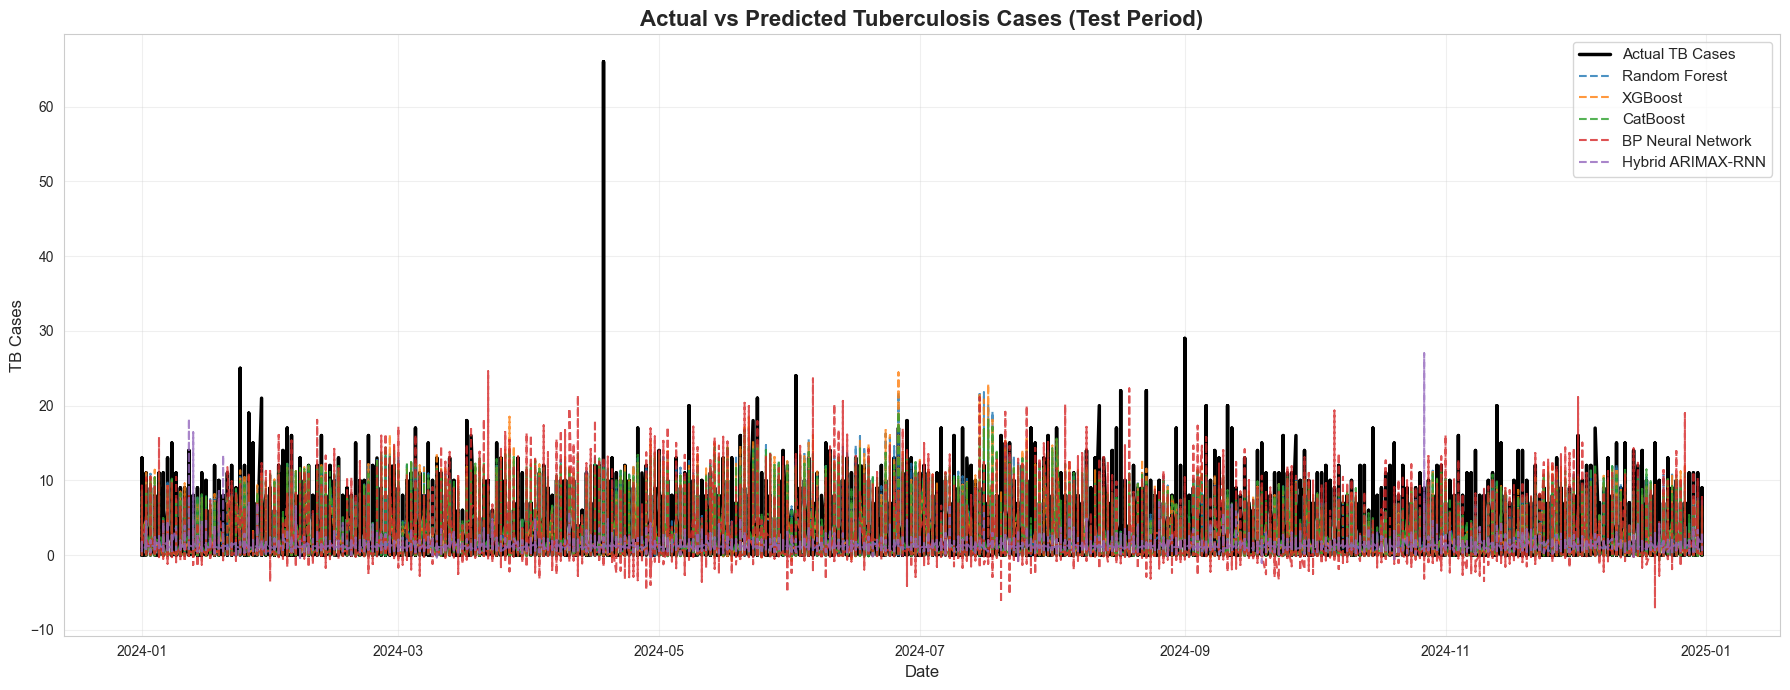

In [48]:
import matplotlib.pyplot as plt

# Ensure date is datetime
predictions_df['date'] = pd.to_datetime(predictions_df['date'])

# Sort by date (important!)
predictions_df = predictions_df.sort_values('date')

# -------------------------------------------------
# Plot actual vs predicted
# -------------------------------------------------
plt.figure(figsize=(18, 7))

plt.plot(predictions_df['date'], predictions_df['actual'], label='Actual TB Cases', color='black', linewidth=2.5)
plt.plot(predictions_df['date'], predictions_df['rf_predicted'], label='Random Forest', linestyle='--', alpha=0.8)
plt.plot(predictions_df['date'], predictions_df['xgb_predicted'], label='XGBoost', linestyle='--', alpha=0.8)
plt.plot(predictions_df['date'], predictions_df['cat_predicted'], label='CatBoost', linestyle='--', alpha=0.8)
plt.plot(predictions_df['date'], predictions_df['bp_predicted'], label='BP Neural Network', linestyle='--', alpha=0.8)
plt.plot(predictions_df['date'], predictions_df['arimax_rnn_predicted'], label='Hybrid ARIMAX-RNN', linestyle='--', alpha=0.8)

plt.title('Actual vs Predicted Tuberculosis Cases (Test Period)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('TB Cases', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save figure
plt.savefig('figures/actual_vs_predicted_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

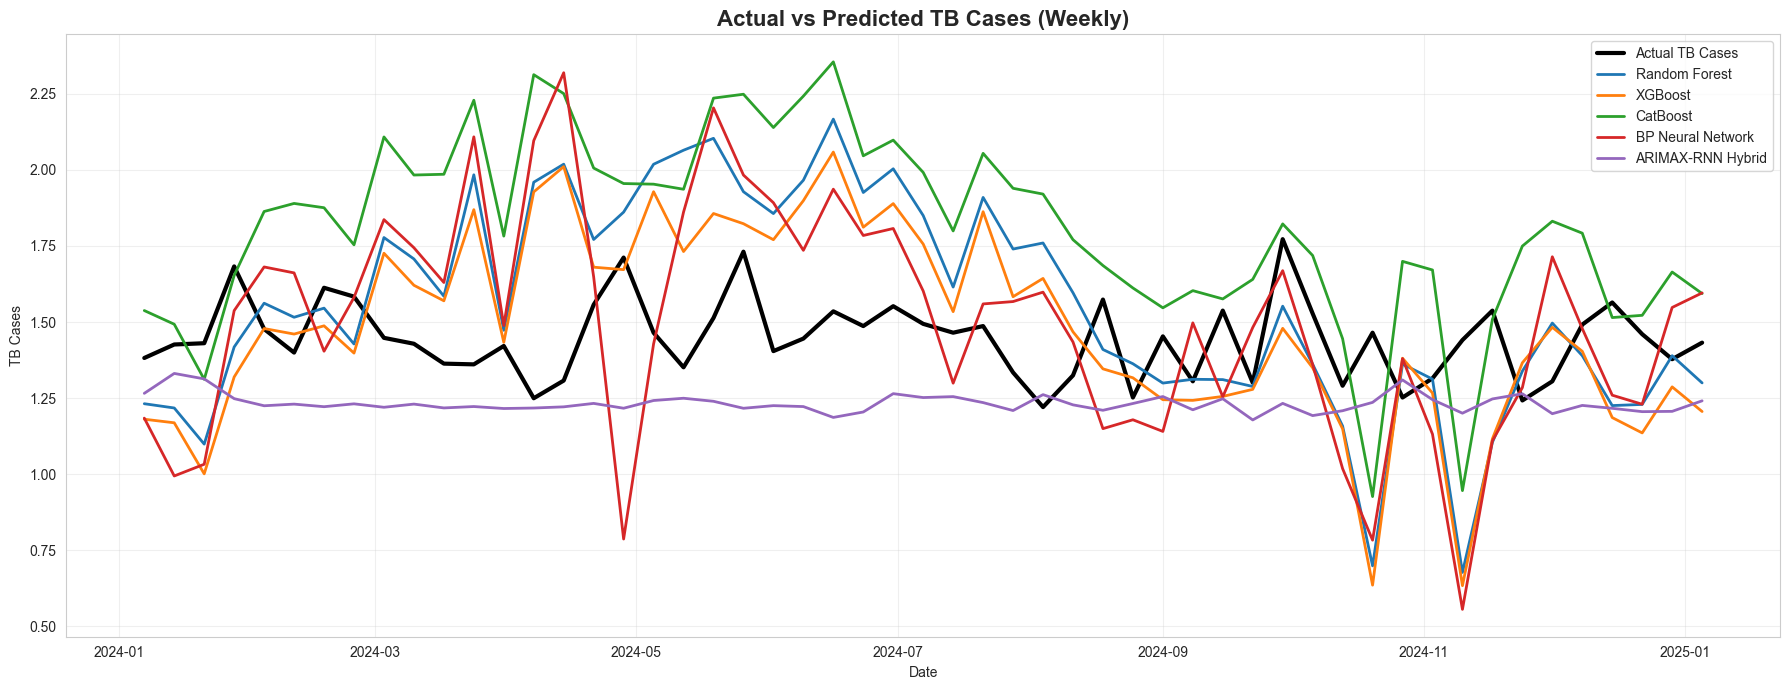

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure date is datetime and sorted
predictions_df['date'] = pd.to_datetime(predictions_df['date'])
predictions_df = predictions_df.sort_values('date')

# Filter for the last 2 years
# Set date as index
zoom_df = zoom_df.set_index('date')

# Resample to weekly data
weekly_df = zoom_df.resample('W').mean()

plt.figure(figsize=(18, 7))

plt.plot(weekly_df.index, weekly_df['actual'], label='Actual TB Cases', color='black', linewidth=3)
plt.plot(weekly_df.index, weekly_df['rf_predicted'], label='Random Forest', linewidth=2)
plt.plot(weekly_df.index, weekly_df['xgb_predicted'], label='XGBoost', linewidth=2)
plt.plot(weekly_df.index, weekly_df['cat_predicted'], label='CatBoost', linewidth=2)
plt.plot(weekly_df.index, weekly_df['bp_predicted'], label='BP Neural Network', linewidth=2)
plt.plot(weekly_df.index, weekly_df['arimax_rnn_predicted'], label='ARIMAX-RNN Hybrid', linewidth=2)

plt.title('Actual vs Predicted TB Cases (Weekly)', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('TB Cases')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

